# Part I - (PROSPER LOAN EXPLORATORY ANALYSIS)
## by (PETER ENNING JUNIOR)

## Introduction
> This aim of this Project is to explore a dataset containing loan information of approximately 113,937 loans. The dataset is the Prosper loan Dataset, provided by Udacity.

# Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
#lets take a look at our data

df = pd.read_csv('prosperLoanData.csv')

df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# Checking the datatypes of the various variables in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Lets take a look at overall summary statistics of our data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The Dataset has 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> The dataset contains a whole lot of information but seems to focus more on two distinct information Borrower information and  loan information

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset contains a whole lot of information but for the purpose of our investigations, the variables/ columns listed below have been choosen as the main focus of interest for Exploration

- Term:	The length of the loan expressed in months.
- LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- BorrowerAPR :	The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate:	The Borrower's interest rate for this loan. 
- LenderYield :	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- EstimatedLoss :	Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
- ProsperRating (Alpha):The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState :	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation :	The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus :	The employment status of the borrower at the time they posted the listing.
- EmploymentStatusDuration :	The length in months of the employment status at the time the listing was created.
- IsBorrowerHomeowner:	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created.
- TotalProsperLoans	Number:  of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
- LoanOriginalAmount:	The origination amount of the loan.
- Recommendations	Number of recommendations the borrower had at the time the listing was created.
- InvestmentFromFriendsCount	Number of friends that made an investment in the loan.
- InvestmentFromFriendsAmount	Dollar amount of investments that were made by friends.
- Investors	: The number of investors that funded the loan.

##### PERFORMING DATA CLEANING ON THE DATASET

In [5]:
#Lets assign all the columns that we want to use for our investigations to a variable
cols = ['Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedLoss','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','StatedMonthlyIncome','TotalProsperLoans','LoanOriginalAmount','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']

#Lets loop through the list of all the columns and remove the unwanted columns one by one
for i in df.columns:
    if i not in cols:
        df.pop(i)

In [6]:
#Checking the new columns
df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedLoss', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
       'Recommendations', 'InvestmentFromFriendsCount',
       'InvestmentFromFriendsAmount', 'Investors'],
      dtype='object')

In [7]:
#lets convert all the columns labels to 
df.columns = map(str.lower, df.columns)


In [8]:
#renaming the columns labels in the dataset
df.columns.values[:] = ['term','loan_status','borrower_apr', 'borrower_rate','lender_yield','estimated_loss','prosper_rating',
                      'prosper_score','listing_category','borrower_state','occupation','employment_status','employment_status_duration','is_borrower_homeowner',
                      'stated_monthly_income', 'total_prosper_loans', 'loan_original_amount','recommendations','investment_from_friends_count','investment_from_friends_amount','investors']

In [9]:
#Checking the renamed columns labels
df.columns

Index(['term', 'loan_status', 'borrower_apr', 'borrower_rate', 'lender_yield',
       'estimated_loss', 'prosper_rating', 'prosper_score', 'listing_category',
       'borrower_state', 'occupation', 'employment_status',
       'employment_status_duration', 'is_borrower_homeowner',
       'stated_monthly_income', 'total_prosper_loans', 'loan_original_amount',
       'recommendations', 'investment_from_friends_count',
       'investment_from_friends_amount', 'investors'],
      dtype='object')

In [10]:
#The Propser_Score variable is a catergorical variable, ordinal catergorical variable to be specific. So we need to change it accordingly
prosper_score = [1,2,3,4,5,6,7,8,9,10]

score = pd.api.types.CategoricalDtype(ordered=True, categories= prosper_score)

# Use pandas.astype() to convert the "Prosper_Score" column from a a float type into an ordered categorical type 
df['prosper_score'] = df['prosper_score'].astype(score);

In [11]:
#The listing_category variable is a catergorical variable, nominal catergorical variable to be specific. So we need to change it accordingly
df['listing_category'] = df['listing_category'].astype('category');

In [12]:
# We know that for the total_prosper_loans variable, those who have not taken a loan before are represented as NULL. So its not 
#like its missing data. Its just incorrect representation of data. So lets change these NULL values to Zero(0)

df['total_prosper_loans'] = df['total_prosper_loans'].fillna(0)

In [13]:
#The length of the loan expressed in months should be converted into an object format to prevent any operation from being 
#performed on them

df['term'] = df['term'].astype('object');

In [14]:
#Checking the number of duplicates in the data
sum(df.duplicated())

1

In [15]:
#Dropping the duplicates from the data
df.drop_duplicates(inplace =True)

In [16]:
#Checking the number of duplicates in the data
sum(df.duplicated())

0

In [17]:
#Dropping all the rows with missing data
df.dropna(axis=0, inplace = True)

In [18]:
#Checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82071 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   term                            82071 non-null  object  
 1   loan_status                     82071 non-null  object  
 2   borrower_apr                    82071 non-null  float64 
 3   borrower_rate                   82071 non-null  float64 
 4   lender_yield                    82071 non-null  float64 
 5   estimated_loss                  82071 non-null  float64 
 6   prosper_rating                  82071 non-null  object  
 7   prosper_score                   82071 non-null  category
 8   listing_category                82071 non-null  category
 9   borrower_state                  82071 non-null  object  
 10  occupation                      82071 non-null  object  
 11  employment_status               82071 non-null  object  
 12  employment_status

In [19]:
#Making a copy of the dataset to be used for the exploration Analysis
loan_data = df.copy()

In [20]:
#lets save this Dataset for later use
loan_data.to_csv('loan_data.csv', index=False)

# Univariate Exploration

**In this section, I investigated distributions of individual variables**

In [21]:
loan_data.describe()

,borrower_apr,borrower_rate,lender_yield,estimated_loss,employment_status_duration,stated_monthly_income,total_prosper_loans,loan_original_amount,recommendations,investment_from_friends_count,investment_from_friends_amount,investors
count,82071.000000,82071.000000,82071.000000,82071.000000,82071.000000,8.207100e+04,82071.000000,82071.000000,82071.000000,82071.000000,82071.000000,82071.000000
mean,0.228869,0.198053,0.188048,0.081325,103.237148,5.915598e+03,0.333979,9003.075776,0.017534,0.008237,4.449797,68.515846
std,0.079214,0.074109,0.074109,0.046653,96.187494,8.329841e+03,0.713835,6214.877444,0.189134,0.110959,118.953456,94.513480
min,0.045830,0.040000,0.030000,0.004900,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,0.000000,0.000000,1.000000
25%,0.167320,0.139600,0.129600,0.044900,31.000000,3.466667e+03,0.000000,4000.000000,0.000000,0.000000,0.000000,1.000000
50%,0.221400,0.189900,0.179900,0.072400,74.000000,5.000000e+03,0.000000,7500.000000,0.000000,0.000000,0.000000,33.000000
75%,0.293630,0.259900,0.249900,0.112000,148.000000,7.083333e+03,0.000000,13000.000000,0.000000,0.000000,0.000000,97.000000
max,0.423950,0.360000,0.340000,0.366000,755.000000,1.750003e+06,8.000000,35000.000000,19.000000,9.000000,11000.000000,1189.000000


#### QUESTION : What is the distribution of the Lenders Yield?

In [79]:
#Creating a funtion to apply the title of the charts and the axes to reduce code reptition
def tr(xL,title):
    plt.title(title)
    plt.xlabel(xL,size = 13)
color = sb.color_palette()[2] 

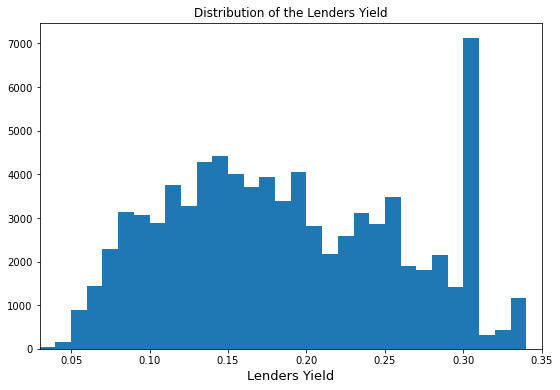

In [80]:
#Checking the distribution of the Lenders Yield
plt.figure(figsize = [9, 6]) 

bins = np.arange(0.03, loan_data['borrower_apr'].max()+0.01, 0.01)
plt.hist(loan_data['lender_yield'], bins = bins);
tr("Lenders Yield","Distribution of the Lenders Yield")
plt.xlim(0.03, 0.35);


**Observation : The histogram shows a distribution slightly skewed to the right with the mode occuring at a lender's yield of 0.30**

#### QUESTION : What is the Distribution of the Borrower Annual Percentage Rate?

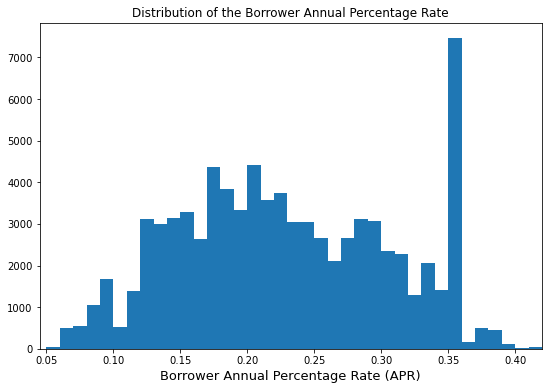

In [81]:
#Checking the distribution of the Borrower's Annual Percentage Rate (APR) for the loan.
plt.figure(figsize = [9, 6]) 

bins = np.arange(0.04, loan_data['borrower_apr'].max()+0.01, 0.01)
plt.hist(loan_data['borrower_apr'], bins = bins);
tr("Borrower Annual Percentage Rate (APR)","Distribution of the Borrower Annual Percentage Rate")
plt.xlim(0.045, 0.42);


**Observation : The histogram of the borrower's APR reveals a distribution with different small peaks but one notable and tallest peak occuring at a Borrowers APR of 0.35 , this is the most common or typical Borrowers APR** 

#### QUESTION : What is the Distribution of the Borrower's Interest Rate for the loan?

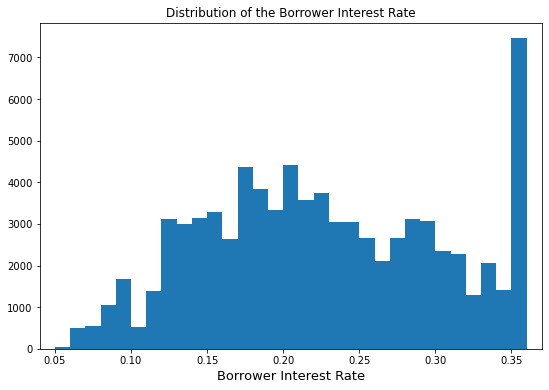

In [82]:
#Checking the distribution of the Borrower's Interest Rate for the loan.
plt.figure(figsize = [9, 6]) 

bins = np.arange(0.04, loan_data['borrower_rate'].max()+0.01, 0.01)
plt.hist(loan_data['borrower_apr'], bins = bins);
tr("Borrower Interest Rate","Distribution of the Borrower Interest Rate")
plt.xlim(0.04, 0.37);


**Question : The histogram of the borrower's Interest rate reveals a distribution with different small peaks but one notable and tallest peak occuring at an Interest rate of 0.35 , this is the most common or typical Interest rate** 

#### QUESTION : What is the preferred loan term amongst borrowers?

In [83]:
#Creating a funtion to apply the title of the charts and the axes to reduce code reptition
def titles(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL,size = 14)
    plt.ylabel(yL,size = 14)
color = sb.color_palette()[2];


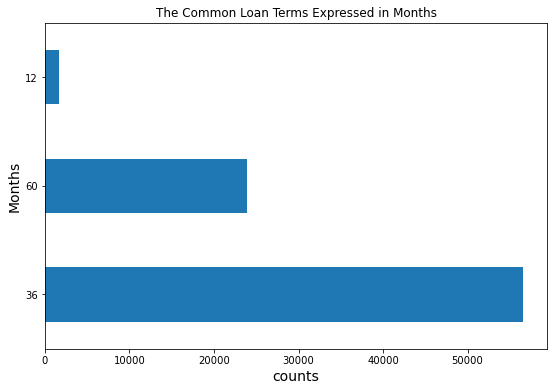

In [84]:
#Checking for the most common loan term expressed in months

plt.figure(figsize = [9, 6]) 
a = loan_data.term.value_counts(ascending = False)
a.plot(kind ="barh")
titles("counts","Months","The Common Loan Terms Expressed in Months")

**Observation : The common loan term preferred by borrowers is 36-months**

#### QUESTION :  What is the common montly income amongst borrowers?

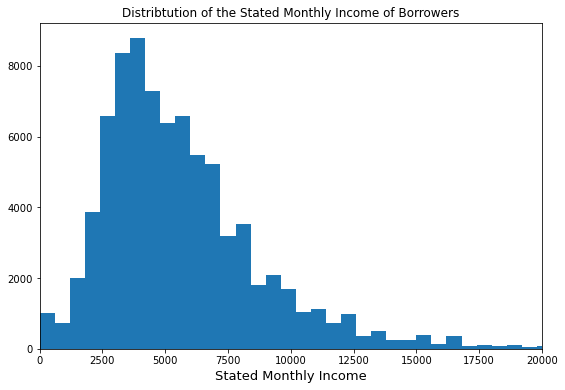

In [85]:
# Using a Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [9, 6])
bin= np.arange(0, loan_data['stated_monthly_income'].max()+600, 600)
plt.hist(data= loan_data, x = 'stated_monthly_income', bins= bin)
tr("Stated Monthly Income","Distribtution of the Stated Monthly Income of Borrowers")
plt.xlim(0, 20000);


**Observation : The stated monthly incomes of borrowers shows a right skewed distribution, with most montly salaries within the 2,500 and 5,000 range**

#### QUESTION : WHAT ARE THE CURRENT STATUSES OF THE LOANS GIVEN BY PROSPER LOANS?

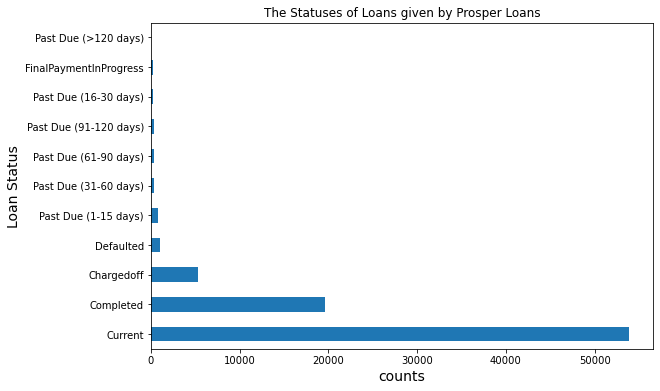

In [86]:
#Investigating the current statuses of loans given by Prosper Loans
plt.figure(figsize = [9, 6]) 

status = loan_data.loan_status.value_counts(ascending = False)

status.plot(kind ="barh")
titles("counts","Loan Status","The Statuses of Loans given by Prosper Loans")

**Observation : The chart reveals that the current loan status is the highest amongst all the other loan statutes. Which means 
majority of the borrowers are making payments on time**

#### QUESTION : What Percentage of Borrowers are HomeOwners?

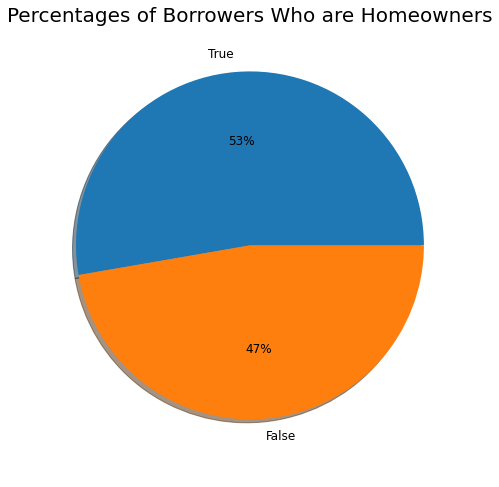

In [87]:
#Investigating the percentage of borrowers who are homeowners

homeowner_percentage = loan_data.is_borrower_homeowner.value_counts()

plt.figure(figsize=(10,8))
plt.title("Percentages of Borrowers Who are Homeowners",fontsize=20)
homeowner_percentage.plot(kind='pie',fontsize=12, autopct='%1.0f%%',shadow = True)
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12);

**Observation: 53% of borrowers are homeowners**  

#### QUESTION : What is the Distribution of the Amount of loans given out?

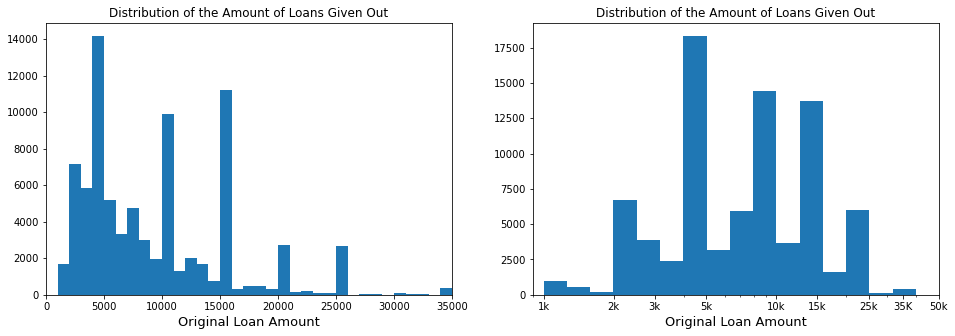

In [88]:
#Investigating the Distribution of the Amount of loans given out

plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)

bin= np.arange(0, loan_data['loan_original_amount'].max()+1000, 1000)
plt.hist(data= loan_data, x = 'loan_original_amount', bins= bin)
tr("Original Loan Amount","Distribution of the Amount of Loans Given Out")
plt.xlim(0, 35000)



# Applying a log transformation to the loan amount
plt.subplot(1, 2, 2)
log_binsize = 0.1
bins = 10 ** np.arange(3, np.log10(loan_data['loan_original_amount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_data, x = 'loan_original_amount', bins = bins)
tr("Original Loan Amount","Distribution of the Amount of Loans Given Out")
plt.xscale('log')
plt.xlim([900, 36000])
plt.xticks([1e3, 2e3, 3e3,5e3, 10e3,15e3, 25e3,35e3,50e3], ["1k", '2k','3k','5k', '10k', '15k', '25k','35K','50k'])
plt.show()


**Observation : The Loan Amounts in the dataset take on a very large range of values and is right skewed as can be seen in the left histogram. Plotted on a logarithmic scale, the distribution of Original Loan Amounts takes on a multimodal shape as can be seen in the right histogram**

#### QUESTION: What are the Top 20 Borrower States?

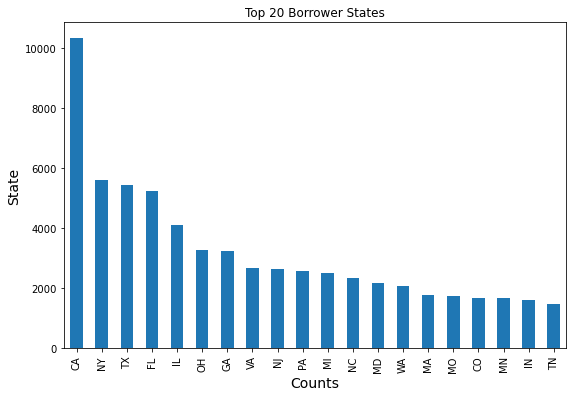

In [98]:
#Investigating the TOP 20 Borrower States 

plt.figure(figsize = [9, 6]) 

state = loan_data.borrower_state.value_counts(ascending = False).head(20)

state.plot(kind ="bar")
titles("Counts","State","Top 20 Borrower States")

**Observation : The barchart reveals that California (CA) is the state with the highest number of borrowers**

#### QUESTION : What are the Top 10 occupations of borrowers?

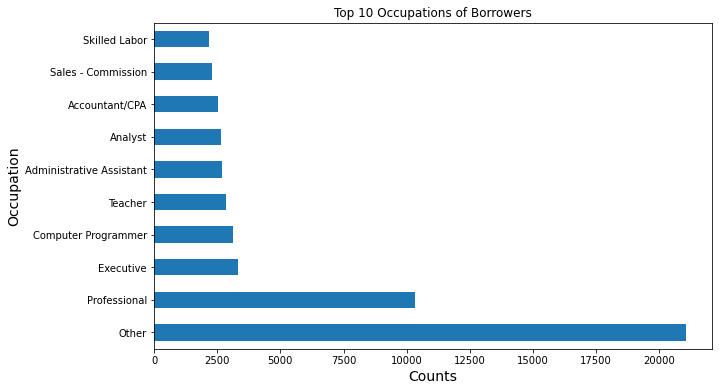

In [99]:
#Investigating the Top 10 Ocupation of Borrowers

plt.figure(figsize = [10, 6]) 

occup = loan_data.occupation.value_counts(ascending = False).head(10)

occup.plot(kind ="barh")
titles("Counts","Occupation","Top 10 Occupations of Borrowers")

**Observation :The chart reveals that the top occupation for borrowers is "other"**


#### QUESTION: What are the Prosper Risk Score of Borrowers?

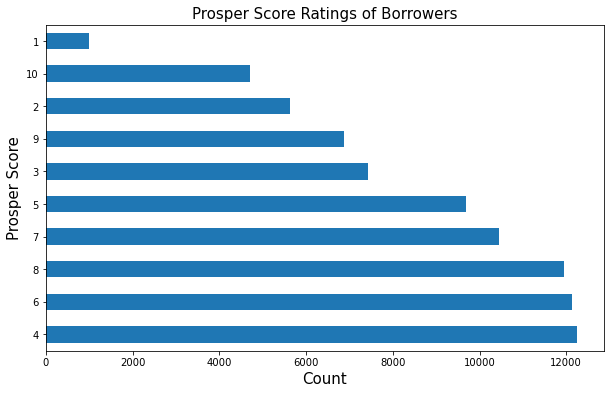

In [126]:
#Investigating the Prosper Score ratings amongst Borrowers

plt.figure(figsize = [10, 6]) 

pros_score = loan_data.prosper_score.value_counts(ascending = False).head(10)

pros_score.plot(kind ="barh")
plt.title("Prosper Score Ratings of Borrowers", size = 15)
plt.xlabel("Count", size = 15)
plt.ylabel("Prosper Score",size = 15);

**Observation: Most of the borrowers(12,256 borrowers) were given a prosper risk score of 4**

#### QUESTION : WHAT ARE THE TOP 10 REASONS WHY BORROWERS TOOK OUT A LOAN?

In [127]:
#Investigating the Distribution of the TOP 10 Reasons for Specified by Borrowers on Listings
listing = loan_data.listing_category.value_counts(ascending = False).head(10)

listing

1     51140
7      9025
2      6607
3      5198
6      2193
13     1946
15     1472
18      863
14      847
20      752
Name: listing_category, dtype: int64

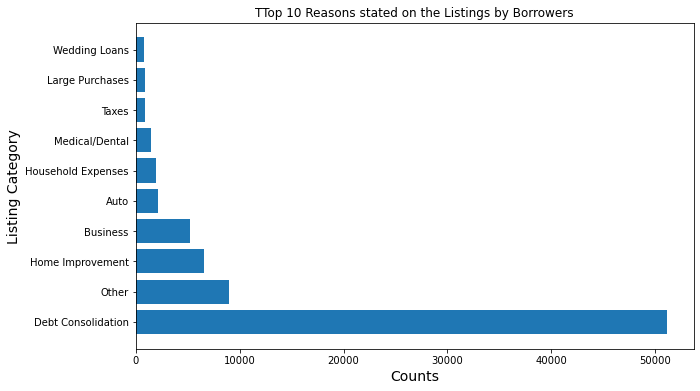

In [94]:
#Plotting a barchart to visualize the univarate distribution
plt.figure(figsize = [10, 6])
# Define Data
listing = list(loan_data.listing_category.value_counts(ascending = False).head(10))

#We already know from the dataset that the various number in the listing categories correspond to a string which denote 
# the reason for taking a loan. So lets assign these reasons to their respective count numbers
labell = ['Debt Consolidation','Other','Home Improvement','Business','Auto','Household Expenses','Medical/Dental','Taxes','Large Purchases','Wedding Loans']

# Plot bar chart
plt.barh( labell, listing)
titles("Counts","Listing Category","TTop 10 Reasons stated on the Listings by Borrowers")

# Display chart
plt.show()


**Observation :The most common reason stated by borrowers for taking a loan is for Debt Consolidation**

#### QUESTION: WHAT ARE THE EMPLOYMENT STATUSES OF BORROWERS WHO APPLIED FOR LOAN?

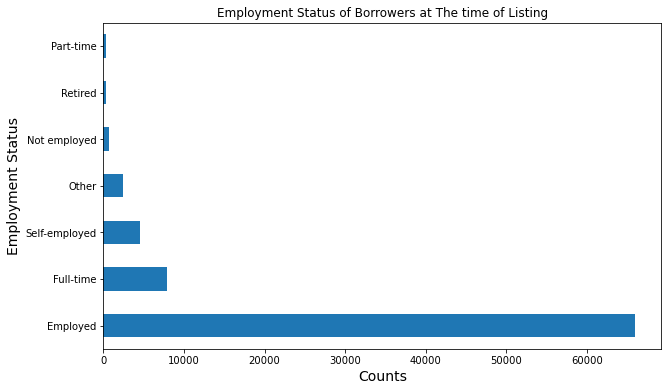

In [96]:
#Investigating the employment status of Borrowers at the time of listing

plt.figure(figsize = [10, 6]) 

stat = loan_data.employment_status.value_counts(ascending = False).head(10)

stat.plot(kind ="barh")
titles("Counts","Employment Status","Employment Status of Borrowers at The time of Listing")

**Observation: It can be seen from the chart that about 65,944 borrowers were employed at the time posting thier listings**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?




I took a look at the distribution of the Original Loan Amounts and discovered that the loan amounts take on a very large range of values and is heavily right skewed. After the distribution was plotted on a logarithmic scale, the distribution of original loan amounts on the Logarithimic scale took on a multimodal shape.The histogram of the borrower's APR and Interest rate reveals a distribution with different small peaks but one notable and tallest peak occuring at a Borrowers APR and Borrower Interest rate of 0.35 respectively.The majority( 21,031) of borrowers stated an occupation of "other" on thier listing. 53% of borrowers are homeowners compared to 47% of borrowers who aren't. The most common loan term preferred by borrowers is 36-months and California has the highest number of borrowers. The most common reason  stated by borrowers for taking a loan was Debt Consolidation. About 65,944 borrowers were employed at the time they posted the listing.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I changed the loan expressed in months from a string to object format to to prevent any operation from being performed on them.
The listing_category variable is a catergorical variable, nominal catergorical variable to be specific. So i changed the datatype to a categorical variable.Also the for total_prosper_loans variable, those who have not taken a loan before are represented as NULL rather than Zero.This is a just incorrect representation of data. So I changed those null values to zero(0)

## Bivariate Exploration
The relationships between pairs of variables was investigated here.

#### QUESTION : WHAT IS THE CORRELATION BETWEEN LISTING CATEGORY AND INTEREST RATE

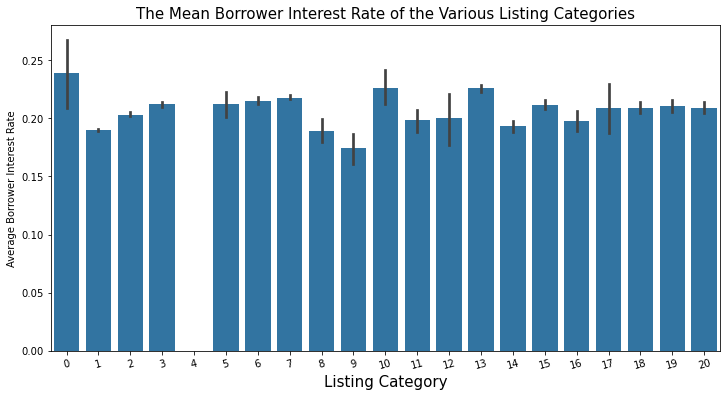

In [130]:
#Investigating the dataset for a correlation between listing category and interest rate

plt.figure(figsize = [12, 6]) 

base_color = sb.color_palette()[0]
sb.barplot(data=loan_data, x='listing_category', y='borrower_rate', color=base_color)
plt.title("The Mean Borrower Interest Rate of the Various Listing Categories", size = 15)
plt.xticks(rotation=15);
plt.ylabel('Average Borrower Interest Rate')
plt.xlabel('Listing Category', size = 15);

**Observation: The Chart reveals that for borrowers who specified Not Available(which corresponds to a listing category of 0) on thier listing have a higher mean interest rate compared to other borrowers**

#### Question : What is the Correlation between Prosper Risk Score and Interest Rate?

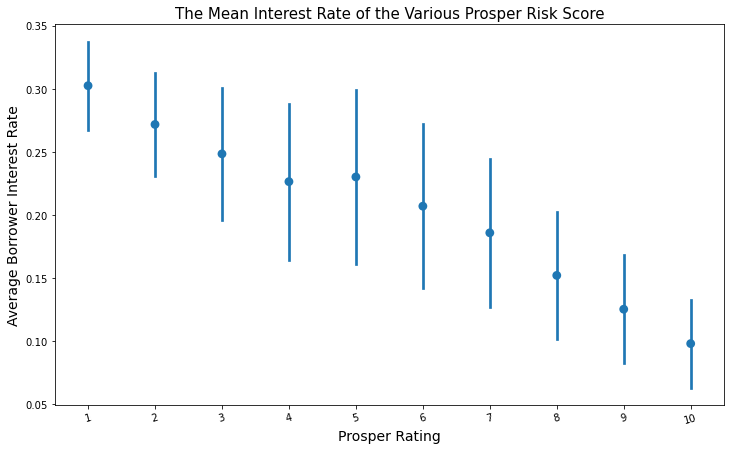

In [131]:
#Investigating the dataset for a correlation between Prosper Risk Score and Interest rate

#Using an Adapted Point PLot here to view the correlations
plt.figure(figsize = [12, 7]) 
sb.pointplot(data=loan_data, x='prosper_score', y='borrower_rate', color=base_color, ci='sd', linestyles="")
plt.xticks();
plt.title("The Mean Interest Rate of the Various Prosper Risk Score", size = 15)
plt.xticks(rotation=15);
plt.ylabel('Average Borrower Interest Rate',size =14);
plt.xlabel('Prosper Rating', size = 14);

**Observation : The chart reveals a very clear trend that, as the prosper risk score increases the average interest rate decreases**

#### QUESTION: Is there a Relationship between Loan Status of Borrowers and  Typical Monthly Income ?

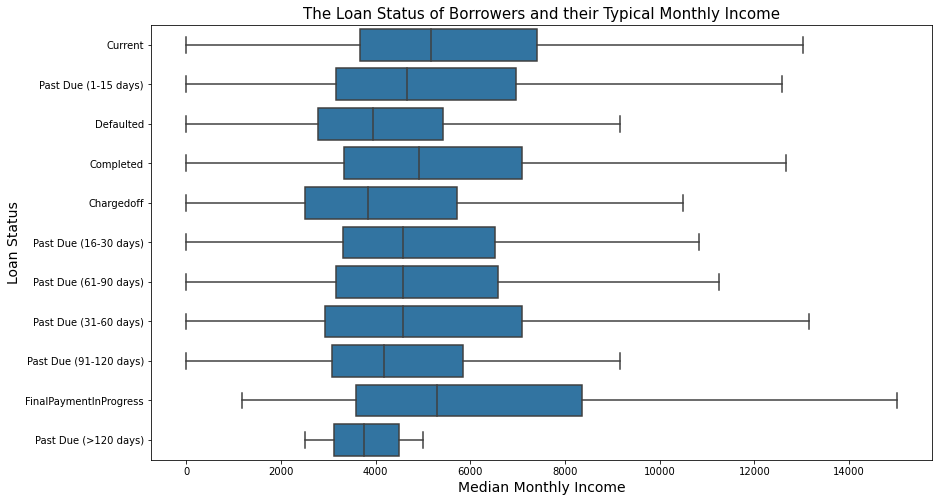

In [24]:
#Investigating the relationship between the loan status of borrowers and Monthly Income. 


#The extreme outliers being accommodated by the scaling would have reuslted in compressed boxes.These outliers were dropped 
#using the showfliers = False statement
base_color = sb.color_palette()[0]
plt.figure(figsize = [14, 8])
sb.boxplot(data= loan_data, y = 'loan_status', x='stated_monthly_income', showfliers=False,color=base_color)
plt.title("The Loan Status of Borrowers and their Typical Monthly Income", size = 15)
plt.ylabel('Loan Status',size =14);
plt.xlabel('Median Monthly Income', size = 14);



**Observation : The box plot reveals that median salary or typical salary of borrowers are higher for those who are in the Final Payment Stage of the Loan**

#### QUESTIONS : Is there a Relationship between Loan Term and Homeownership?

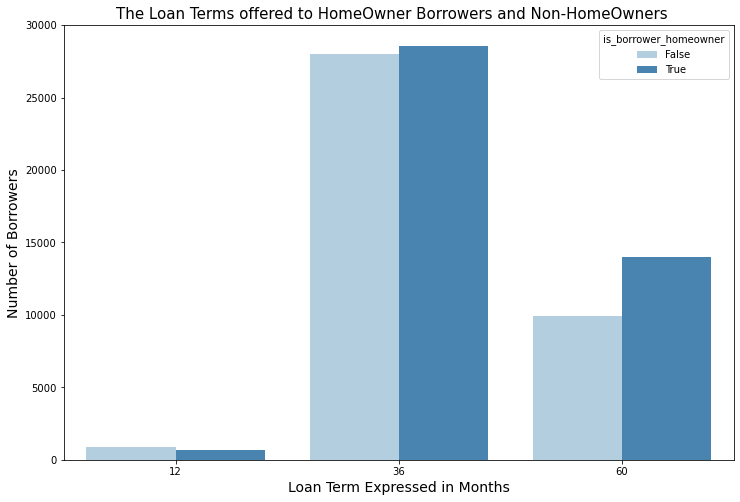

In [126]:
#Investigating the relationhip between Loan term and Homeowners
plt.figure(figsize = [12, 8])
sb.countplot(data = loan_data, x = 'term', hue = 'is_borrower_homeowner', palette = 'Blues');
plt.title("The Loan Terms offered to HomeOwner Borrowers and Non-HomeOwners   ", size = 15)
plt.ylabel('Number of Borrowers',size =14);
plt.xlabel('Loan Term Expressed in Months', size = 14);

**Observation : The Clustered chart shows that for the 3 different types of loan terms, borrowers who are homeowners prefer to take out a 36-month loan term** 

#### QUESTIONS : What is the correlation between  borrower rate and lender's yeld?

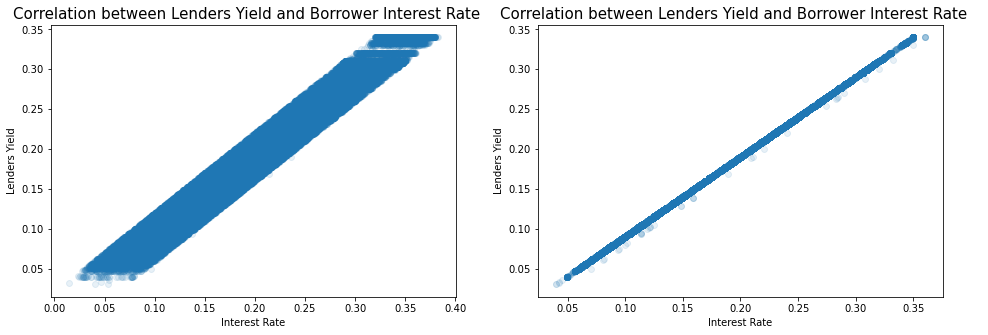

In [88]:
# Visualizing the correlation between Lender's Yield and Interest Rate. The matlabplotlib scatter plot and sea born scatter plot 
#are both used for the visualization

plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)

sb.regplot(data = loan_data, x = 'borrower_rate', y = 'lender_yield', x_jitter=0.03, scatter_kws={'alpha':1/10}, fit_reg=False)

plt.title("Correlation between Lenders Yield and Borrower Interest Rate   ", size = 15)
plt.xlabel('Interest Rate')
plt.ylabel('Lenders Yield');


plt.subplot(1, 2, 2)
plt.scatter(data = loan_data,x = 'borrower_rate', y = 'lender_yield', alpha = 1/10)
plt.title("Correlation between Lenders Yield and Borrower Interest Rate   ", size = 15)
plt.xlabel('Interest Rate')
plt.ylabel('Lenders Yield');


**Observation : The scatter plots shows a positive correlation between Lender's Yield and Interest Rate**

#### Question: What are the mean Interest Rate offered to Borrowers of Different Employment Statuses?

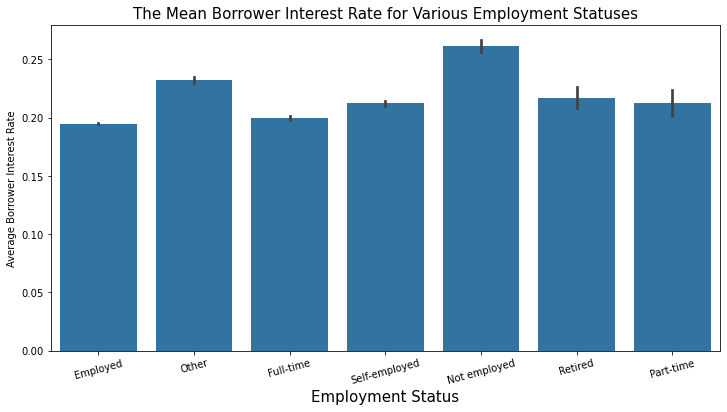

In [143]:
plt.figure(figsize = [12, 6]) 

base_color = sb.color_palette()[0]
sb.barplot(data=loan_data, x='employment_status', y='borrower_rate', color=base_color)
plt.title("The Mean Borrower Interest Rate for Various Employment Statuses", size = 15)
plt.xticks(rotation=15);
plt.ylabel('Average Borrower Interest Rate')
plt.xlabel('Employment Status', size = 15);

**Observation : The mean interest rate of Borrowers who are unemployed is the highest amongst the various employment statuses**

#### QUESTION: What are Preferred Loan Terms of the Borrowers of various Employment Statuses?

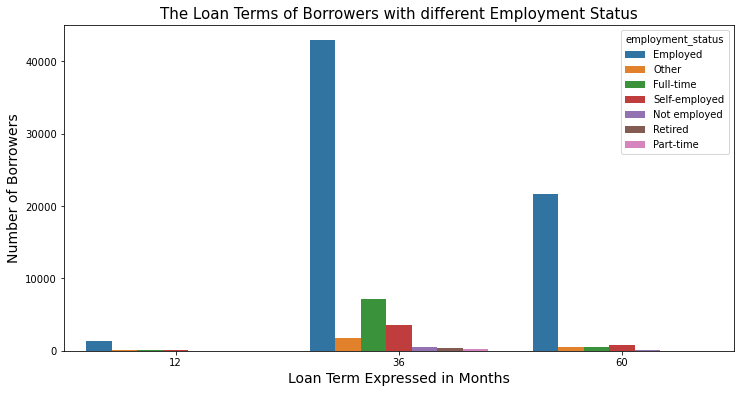

In [180]:
plt.figure(figsize = [12, 6]) 
sb.countplot(data = loan_data, x = 'term', hue = 'employment_status')
plt.title("The Loan Terms of Borrowers with different Employment Status", size = 15)
plt.ylabel('Number of Borrowers',size =14);
plt.xlabel('Loan Term Expressed in Months', size = 14);

**Observation : The clustered chart reveals that the employed borrowers prefer to take out a 36 month loan**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There seems to be a positive relatonship between the Interest Rate and Lender's Yield. This relationship is intuitive because 
the yield is how much the lender makes on a loan, so as the interest rate increases the Lender's Yield also increase. An invesitgation into the relationship between prosper risk score and borrower interest rate reveals that, as the prosper risk score  increases, the average interest rate decreases.The interest rate for borrowers who specified Not Available(which corresponds to a listing category of 0) on thier listing recieved higher interest rate compared to other borrowers who specified other reasons.For the three(3) different types of loan terms, borrowers who are homeowners prefer to take out a 36-month loan term.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Borrowers who are Unemployed have a higher interest rate.
- Employed Borrowers prefer taking out a 36 month loan .

## Multivariate Exploration


#### Question : Is there a Relationship between loan term, lender's yield and borrowers interest rate?

<Figure size 864x432 with 0 Axes>

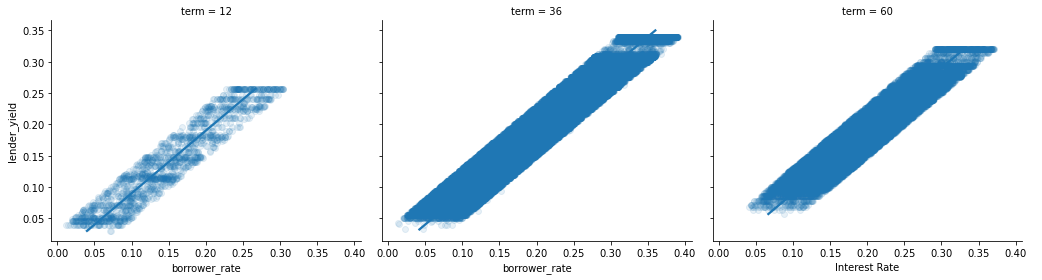

In [206]:
# investigating the relationship of term on the lender's yield and borrowers interest rate
plt.figure(figsize = [12, 6])
g=sb.FacetGrid(data=loan_data, aspect=1.2, height=4, col='term', col_wrap=3)
g.map(sb.regplot, 'borrower_rate', 'lender_yield', x_jitter=0.04, scatter_kws={'alpha':0.1})
plt.xlabel('Interest Rate')
plt.ylabel('Lenders Yield')
g.add_legend();

**Observation : The plot reveals a postive effect of loan term on the correlation between lender's yield and borrower rate. The lender's yield for a 36 month loan term is much higher than for a 12 month loan term and slightly higher than 60 month loan terms**

#### Question : What is the effect of Stated monthly income on Prosper score and Homeownership? 

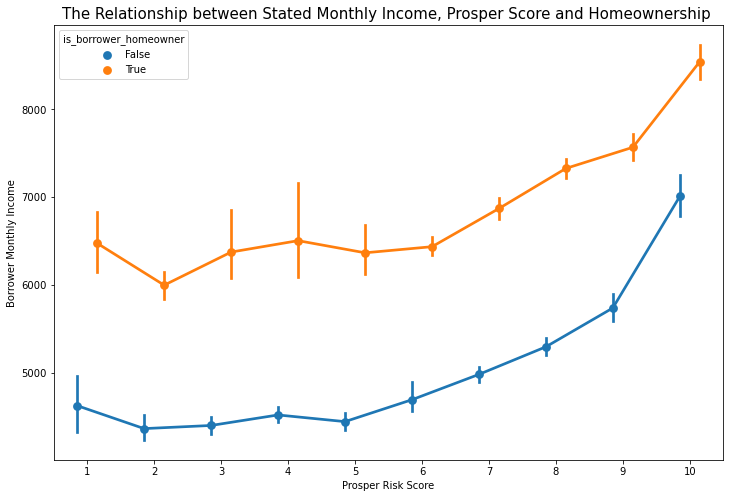

In [212]:
#Investigating the effect of stated_monthly income on prosper score and homeownership 
plt.figure(figsize = [12, 8])
ax = sb.pointplot(data = loan_data, x = 'prosper_score', y = 'stated_monthly_income', hue = 'is_borrower_homeowner',dodge = 0.3)
plt.title("The Relationship between Stated Monthly Income, Prosper Score and Homeownership ", size = 15)
plt.xlabel('Prosper Risk Score')
plt.ylabel('Borrower Monthly Income');


**Observation : The chart reveals an upward trend in monthly income as prosper risk score increases for both homeowners and non Homeowners. With Homeowners earning higher montly salaries than non-homeowners**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* There is a postive effect on the correlation between lender's yield and borrower rate. The lender's yield for a 36 month loan term is higher than the 60  and 12 month loan terms. There exist an upward trend in monthly income as prosper risk score increases for both homeowners and non Homeowners.Homeowners earn higher monthly salaries than non-homeowners.

### Were there any interesting or surprising interactions between features?

* None

## Conclusions

This Project focused on the Exploration of a Prosper Loan Dataset. The dataset variables in the dataset can be catgorized as personal details about borrower and information on loans. Before the analyzing the dataset, i performed some data wrangling on the dataset.I changed the loan expressed in months from a string to object format to prevent any operation from being performed on them.The listing_category variable is a catergorical variable, a nominal catergorical variable to be specific. So i changed the datatype to a categorical variable.Also the for Total Prosper Loans variable, those who have not taken a loan before are represented as NULL rather than Zero.This is a just incorrect representation of data. So I changed those null values to zero(0).

The analysis of the dataset first began with a Univariate Exploration of the variables in the dataset. The distribution of the Original Loan Amounts was found to have very large range of values and was heavily right skewed.It was also discovered that 53% of borrowers are Homeowners, whilst 47% of borrowers aren't. Investigation into the distribution of the borrower states revealed California to be the state with the highest number of borrowers.Whilst about 65,944 borrowers were employed at the time they posted the listing,the most common reason stated by borrowers for taking a loan was for Debt Consolidation.Most borrowers also prefer to take out a 38 month loan term. 

To explore the relationships between pairs of variables, a bivarate exploration was performed.It was discovered that as the interest rate increases the lender's yield increases. This is an intuitive insight because the yield is how much the lender makes on a loan, so as the interest rate increases the lender's yield is bound to increase. The Prosper risk score which ranges from 1-10, with 10 being the best, or lowest risk score showed a negative correlation with borrower interest rate.With the  average borrower interest rate decreasing as the prosper risk score increases.The interest rate for borrowers who specified Not Available (which corresponds to a listing category of 0) on thier listing recieved higher interest rate compared to other borrowers who specified other reasons

Finally, a multivaraite exploration of the variables in the dataset was performed to explore the realtionships between multiple variables.There was a postive effect on the correlation between lender's yield and borrower rate. The lender's yield for a 36 month loan term was higher than the 60 and 12 month loan terms. An upward trend in monthly income as prosper risk score increases for both homeowners and non Homeowners was discovered. Borrowers who are Homeowners earn higher monthly salaries than non-Homeowners.
